In [1]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np

from src.quantum_knapsack import *

In [2]:
@timer_decorator
def create_knapsack(values, weights, capacity):
    knapsack: Knapsack = Knapsack(values, weights, capacity)
    print(knapsack)
    return knapsack

@timer_decorator
def create_coffey(knapsack, penalty_scale):
    return Coffey(knapsack, penalty_scale)

@timer_decorator
def create_basis(dimension):
    return StandardBasis(dimension)

@timer_decorator
def coffey_init(coffey, basis):
    coffey.initialize(basis)

@timer_decorator
def create_solver(basis, coffey):
    return QuantumAnnealer(basis, coffey)

@timer_decorator
def solver_init(solver, h_strength, energy_scale, time_scale, max_iterations):
    solver.initialize(AnnealingParameters(h_strength, energy_scale, time_scale, max_iterations))

@timer_decorator
def solver_init_alt(solver, h_strength, energy_scale, time_scale, max_iterations):
    solver.initialize_alt(AnnealingParameters(h_strength, energy_scale, time_scale, max_iterations))

@timer_decorator
def solve(solver):
    solver.solve()

@timer_decorator
def solve_alt_numerical(solver):
    solver.solve_alt_numerical()

@timer_decorator
def solve_alt_analytical(solver):
    solver.solve_alt_analytical()

@timer_decorator
def format_result(solver, max_time):
    return solver.get_result(max_time)

In [3]:
# Test cases

values = np.array([10, 2])
weights = np.array([1, 2])
capacity = 2

# values = np.array([2, 5, 7, 3])
# weights = np.array([5, 6, 8, 7])
# capacity = 14

# values = np.array([8, 3, 5, 6, 9])
# weights = np.array([1, 2, 1, 3, 2])
# capacity = 7

# values = np.array([6, 5, 8, 9, 6, 7, 3])
# weights = np.array([2, 3, 6, 7, 5, 8, 4])
# capacity = 9

In [4]:
penalty_scale = 31.0
initial_h_strength = 11.0
energy_scale = 1e-30
time_scale = 1e-6
max_iterations = 4
sub_iterations = 4

knapsack: Knapsack = create_knapsack(values, weights, capacity)
coffey: Mapping = create_coffey(knapsack, penalty_scale)
basis: Basis = create_basis(coffey.dimension)
coffey_init(coffey, basis)

Knapsack Problem (Capacity: 2)
Profits:  10.0  2.0
Weights:  1.0  2.0
'create_knapsack' executed in:	0.0001s
'create_coffey' executed in:	0.0000s
'create_basis' executed in:	0.0002s
'coffey_init' executed in:	0.0002s


In [5]:
solution: SolutionAnalyzer = SolutionAnalyzer(knapsack)

print(solution)

Solution Analyzer Results
Number of items: 2
Number of ancilla qubits: 2
Number of valid solutions: 2

Valid Solutions:
Solution 1: Binary=1001, Items=[1, 0], Value=10.00, Weight=1.00
Solution 2: Binary=1010, Items=[1, 0], Value=10.00, Weight=1.00


In [6]:
solver: QuantumAnnealer = create_solver(basis, coffey)
solver_init(solver, initial_h_strength, energy_scale, time_scale, max_iterations)
solve(solver)

result: Result = format_result(solver, sub_iterations)

times: np.ndarray = result.times
eigenvalues: np.ndarray = np.array(result.eigenspectrum)
expectation_values: List[float] = result.expectation_values
print()
print(f"Final ground eigenvalue: {eigenvalues[-1, 0]:.3f}\t|\tFinal expectation value: {expectation_values[-1]:.3f}")

'create_solver' executed in:	0.0000s
'solver_init' executed in:	0.0006s
'solve' executed in:	0.0000s
'format_result' executed in:	0.0001s

Final ground eigenvalue: -10.000	|	Final expectation value: 52.220


In [7]:
spectrum_size: int = 5

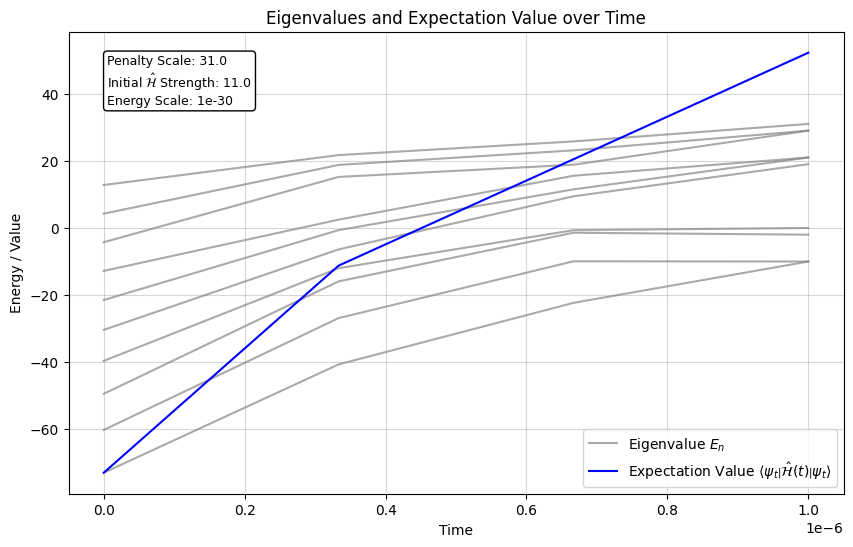

In [8]:
_, ax = plt.subplots(figsize=(10, 6))

for i in range(10):
    ax.plot(times, eigenvalues[:, i], c="gray", ls="-", alpha=2 / 3, label=r"Eigenvalue $E_n$" if i == 0 else "")

ax.plot(times, expectation_values, c="b", ls="-",
        label=r"Expectation Value $\left\langle\psi_t\right|\hat{\mathcal{H}}\left(t\right)\left|\psi_t\right\rangle$")

text = '\n'.join([
    f'Penalty Scale: {result.problem_parameters.penalty_scale}',
    r'Initial $\hat{\mathcal{H}}$ Strength: ' + str(result.algorithm_parameters.initial_h_strength),
    f'Energy Scale: {result.algorithm_parameters.energy_scale}',
])

props = dict(boxstyle='round', facecolor='white')
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

ax.set_title("Eigenvalues and Expectation Value over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Energy / Value")
ax.legend()
ax.grid(visible=True, linestyle="-", alpha=0.5)

plt.show()

In [9]:
len(result.eigenspectrum)

4

In [10]:
solver: QuantumAnnealer = create_solver(basis, coffey)
solver_init(solver, initial_h_strength, energy_scale, time_scale, max_iterations)
solve_alt_analytical(solver)

result: Result = format_result(solver, sub_iterations)

times: np.ndarray = result.times
eigenvalues: np.ndarray = np.array(result.eigenspectrum)
expectation_values: List[float] = result.expectation_values
print()
print(f"Final ground eigenvalue: {eigenvalues[-1, 0]:.3f}\t|\tFinal expectation value: {expectation_values[-1]:.3f}")

'create_solver' executed in:	0.0000s
'solver_init' executed in:	0.0007s
'solve_alt_analytical' executed in:	0.0002s
'format_result' executed in:	0.0001s

Final ground eigenvalue: -10.000	|	Final expectation value: 79.800


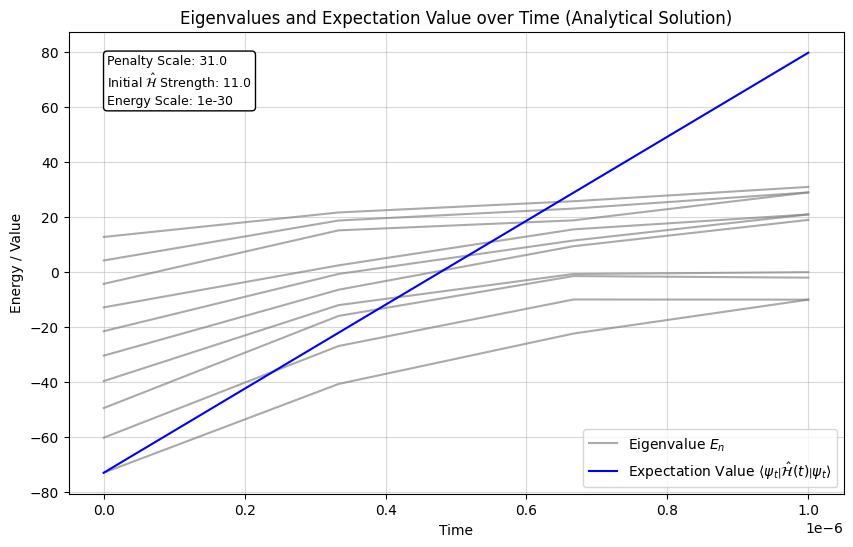

In [11]:
_, ax = plt.subplots(figsize=(10, 6))

for i in range(10):
    ax.plot(times, eigenvalues[:, i], c="gray", ls="-", alpha=2 / 3, label=r"Eigenvalue $E_n$" if i == 0 else "")

ax.plot([times[0]] + [times[-1]], expectation_values, c="b", ls="-",
        label=r"Expectation Value $\left\langle\psi_t\right|\hat{\mathcal{H}}\left(t\right)\left|\psi_t\right\rangle$")

text = '\n'.join([
    f'Penalty Scale: {result.problem_parameters.penalty_scale}',
    r'Initial $\hat{\mathcal{H}}$ Strength: ' + str(result.algorithm_parameters.initial_h_strength),
    f'Energy Scale: {result.algorithm_parameters.energy_scale}',
])

props = dict(boxstyle='round', facecolor='white')
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

ax.set_title("Eigenvalues and Expectation Value over Time (Analytical Solution)")
ax.set_xlabel("Time")
ax.set_ylabel("Energy / Value")
ax.legend()
ax.grid(visible=True, linestyle="-", alpha=0.5)

plt.show()

In [12]:
solver: QuantumAnnealer = create_solver(basis, coffey)
solver_init(solver, initial_h_strength, energy_scale, time_scale, max_iterations)
solve_alt_numerical(solver)

result: Result = format_result(solver, sub_iterations)

times: np.ndarray = result.times
eigenvalues: np.ndarray = np.array(result.eigenspectrum)
expectation_values: List[float] = result.expectation_values
print()
print(f"Final ground eigenvalue: {eigenvalues[-1, 0]:.3f}\t|\tFinal expectation value: {expectation_values[-1]:.3f}")

'create_solver' executed in:	0.0000s
'solver_init' executed in:	0.0010s
'solve_alt_numerical' executed in:	0.0092s
'format_result' executed in:	0.0001s

Final ground eigenvalue: -10.000	|	Final expectation value: 80.271


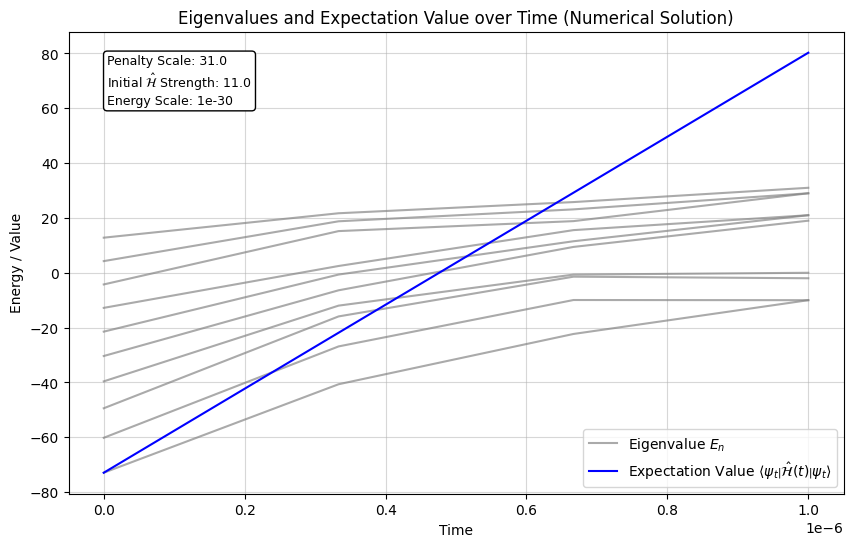

In [13]:
_, ax = plt.subplots(figsize=(10, 6))

for i in range(10):
    ax.plot(times, eigenvalues[:, i], c="gray", ls="-", alpha=2 / 3, label=r"Eigenvalue $E_n$" if i == 0 else "")

ax.plot([times[0]] + [times[-1]], expectation_values, c="b", ls="-",
        label=r"Expectation Value $\left\langle\psi_t\right|\hat{\mathcal{H}}\left(t\right)\left|\psi_t\right\rangle$")

text = '\n'.join([
    f'Penalty Scale: {result.problem_parameters.penalty_scale}',
    r'Initial $\hat{\mathcal{H}}$ Strength: ' + str(result.algorithm_parameters.initial_h_strength),
    f'Energy Scale: {result.algorithm_parameters.energy_scale}',
])

props = dict(boxstyle='round', facecolor='white')
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

ax.set_title("Eigenvalues and Expectation Value over Time (Numerical Solution)")
ax.set_xlabel("Time")
ax.set_ylabel("Energy / Value")
ax.legend()
ax.grid(visible=True, linestyle="-", alpha=0.5)

plt.show()

In [14]:
print(expectation_values)

[-72.93966018  80.27127163]


In [15]:
result._observables[-1].measure(result._states[-1])

80.2712716293199